In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
# %matplotlib qt
import sys
sys.path.append('C:\code\qdc2')
import matplotlib.pyplot as plt 
import os 
import numpy as np 
from qdc.mmf.many_wl_fiber import ManyWavelengthFiber
from qdc.mmf.qdc_experiment import QDCMMFExperiment
from qdc.misc import tnow
DATA_DIR = os.path.join(os.path.abspath(os.path.curdir), 'data')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
is_step_index = True
fiber_L = 0.1e6  if is_step_index else 1e6 # um 
N_wl = 81
N_classical = 1
N_SPDC = 1
wl0 = 0.810
Dwl = 0.020 if is_step_index else 0.080
NA_ref = 0.2   
# dzs = [0, 10, 50, 200, 1000]
dzs = [0]
free_mode_matrix = False
autosolve = not free_mode_matrix

npoints = 2**7
n_pixels_diameter = 2*npoints//5 if is_step_index else npoints//4
s = ManyWavelengthFiber(wl0=wl0, Dwl=Dwl, N_wl=N_wl, fiber_L=fiber_L, rng_seed=5555, is_step_index=is_step_index, 
                        npoints=npoints, NA_ref=NA_ref, autosolve=autosolve)
s.gaussian_params = np.array([2.7, 7, 10, 0.5, 0.5]) 
s.gaussian_dparams = np.array([1, 5, 5, 0.3, 0.3])
# s.gaussian_dparams = np.array([0, 4, 4, 0.1, 0.1])

exp = QDCMMFExperiment(s, free_mode_matrix=free_mode_matrix)
exp._set_PCC_slice(n_pixels_diameter=n_pixels_diameter)
res = exp.run_PCCs_different_dz(dzs=dzs, N_classical=N_classical, N_SPDC=N_SPDC)
# res.show(title='')
# res.show_incoherent_sum()

f_type = 'SI' if is_step_index else 'GRIN'
saveto_path = rf'{DATA_DIR}\\{tnow()}_{f_type}_{round(fiber_L*1e-6, 2)}m.npz'
# res.saveto(saveto_path)

Getting 81 fibers...


81it [00:08,  9.01it/s]


Got fibers!
Getting classical with average on 1 ...


Running classical measurements: 100%|██████████| 1/1 [00:16<00:00, 16.61s/it]


Getting SPDC with average on 1, dz=0 ...


Running SPDC measurements: 100%|██████████| 1/1 [00:31<00:00, 31.64s/it]


In [33]:
res.metadata["g_params_list"]

[array([ 3.63623119, 11.8141825 ,  7.08857431,  0.49673372,  0.45144411]),
 array([ 3.17616871, 10.25220938, 10.02976706,  0.44277228,  0.49638098]),
 array([ 3.28382961,  6.72196672, 14.38971386,  0.22018803,  0.79698095]),
 array([2.96199436, 3.59774653, 9.08504867, 0.53519544, 0.59616758]),
 array([ 2.33280739,  5.77732416, 13.2982858 ,  0.31669348,  0.54005476]),
 array([ 2.40507276,  9.19409535, 10.06129307,  0.73621974,  0.389413  ]),
 array([1.75553547, 8.84462883, 9.63175826, 0.26264618, 0.26804328]),
 array([2.54272797, 3.95852441, 5.17220054, 0.4991255 , 0.50210315]),
 array([ 2.35818091, 11.8703078 ,  5.11528345,  0.20840178,  0.66705678]),
 array([ 3.36488896, 11.16523   , 14.29618526,  0.62332619,  0.5484686 ])]

[ 3.63623119 11.8141825   7.08857431  0.49673372  0.45144411]


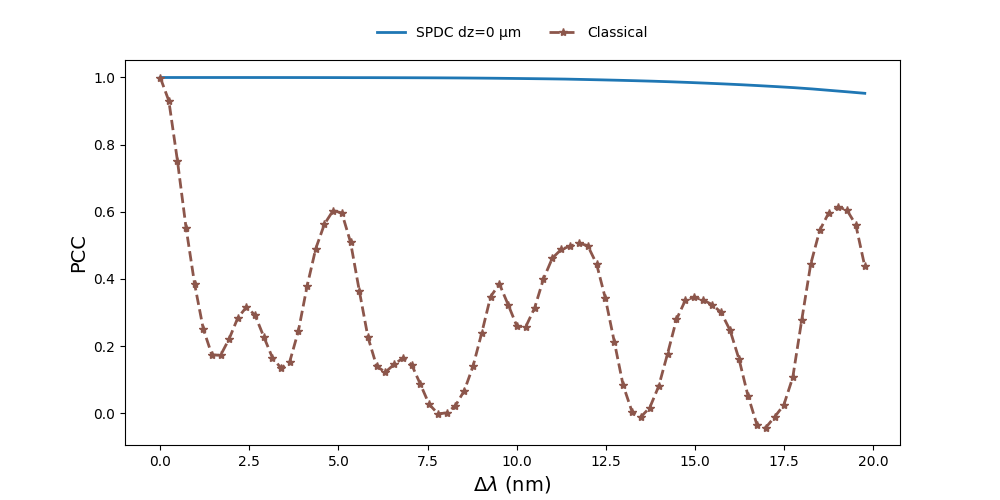

In [6]:
iter_no = None
dz = 0
print(res.metadata["g_params_list"][iter_no or 0])
res.show(title='', iter_no=iter_no, show0=False)
# for i in range(5):
    # res.show_incoherent_sum(iter_no=i, dz=dz)
    # res.show(title='', iter_no=i, show0=False)

# res.show_incoherent_sum(iter_no=iter_no, dz=dz)

## View input and output fields + mode distribution for given gaussian params 

In [ ]:
f = s.fibers[80]
f.set_input_gaussian(sigma=3, X0=5, Y0=10, X_linphase=0.4, Y_linphase=0.4, random_phase=0.0)
f.propagate(False)

fig, axes = plt.subplot_mosaic(
    [["left", "right"],
     ["bottom", "bottom"]],
    figsize=(9, 6)
)

from matplotlib import patches
# make circle centered in the middle of the plot
circle = patches.Circle((f.npoints//2, f.npoints//2), 25/f.index_profile.dh, color='red', fill=False, linestyle='dashed')
axes["left"].add_patch(circle)
f.show_profile(f.profile_0,   ax=axes["left"],   title='input')
f.show_profile(f.profile_end, ax=axes["right"],  title='output')
axes["bottom"].plot(np.abs(f.modes_0)**2)
plt.tight_layout()


In [14]:
f.show_mode(20)

In [71]:
for f in s.fibers:
    print(f.NA)
    print(f.Nmodes)

0.2000112749167079
389
0.20001098976659235
389
0.20001070460261175
389
0.2000104194246639
389
0.2000101342326522
389
0.20000984902648106
389
0.20000956380604942
389
0.20000927857125952
389
0.20000899332201139
389
0.2000087080582095
389
0.20000842277975162
389
0.20000813748654112
389
0.2000078521784791
389
0.20000756685546345
389
0.2000072815173974
389
0.20000699616418108
389
0.20000671079571333
389
0.20000642541189528
389
0.20000614001262587
389
0.20000585459780842
389
0.20000556916733742
389
0.20000528372111506
389
0.20000499825904142
387
0.20000471278101534
387
0.20000442728693354
387
0.2000041417766994
385
0.20000385625020728
385
0.20000357070735728
385
0.20000328514804938
383
0.20000299957218137
385
0.20000271397964994
383
0.2000024283703551
383
0.2000021427441924
383
0.2000018571010596
383
0.20000157144085792
383
0.20000128576348172
383
0.2000010000688277
383
0.20000071435679592
383
0.20000042862727965
383
0.2000001428801778
383
0.1999998571153882
381
0.19999957133280527
381
0.199